### Antriksh Gupta - GRIPDecember22

### Importing Libraries & Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
mdf = pd.read_csv('matches.csv')
ddf = pd.read_csv('deliveries.csv')
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
mdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Data Preprocessing

In [4]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
mdf.drop(['umpire3'], axis = 1, inplace = True)

In [6]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
ddf.drop(['player_dismissed', 'fielder'], axis = 1, inplace = True)

### Analysis of Matches

In [8]:
mdf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
mdf['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [10]:
# no. of seasons
mdf['season'].nunique()

12

In [11]:
mdf['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
mdf['team2'].nunique()

15

In [13]:
# team won a match by max runs 
mdf.iloc[mdf['win_by_runs'].idxmax()].winner

'Mumbai Indians'

In [14]:
# team won a match by max wickets 
mdf.iloc[mdf['win_by_wickets'].idxmax()].winner

'Kolkata Knight Riders'

In [15]:
# no. of matches played by team
(mdf.team1.value_counts() + mdf.team2.value_counts()).sort_values(ascending = False)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

<AxesSubplot:>

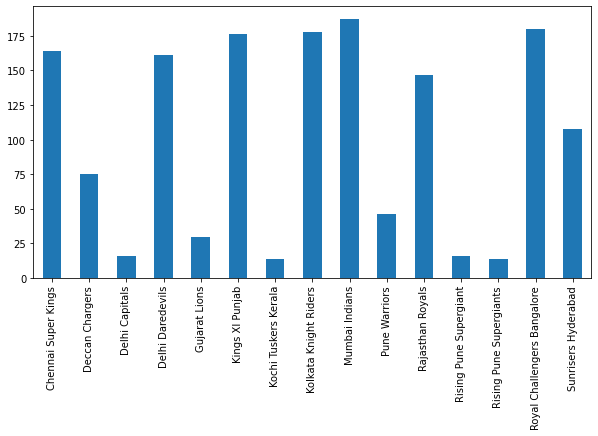

In [16]:
(mdf.team1.value_counts() + mdf.team2.value_counts()).plot(kind = 'bar', figsize = [10, 5])

In [17]:
# max no. of matches won by any team
mdf.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:ylabel='winner'>

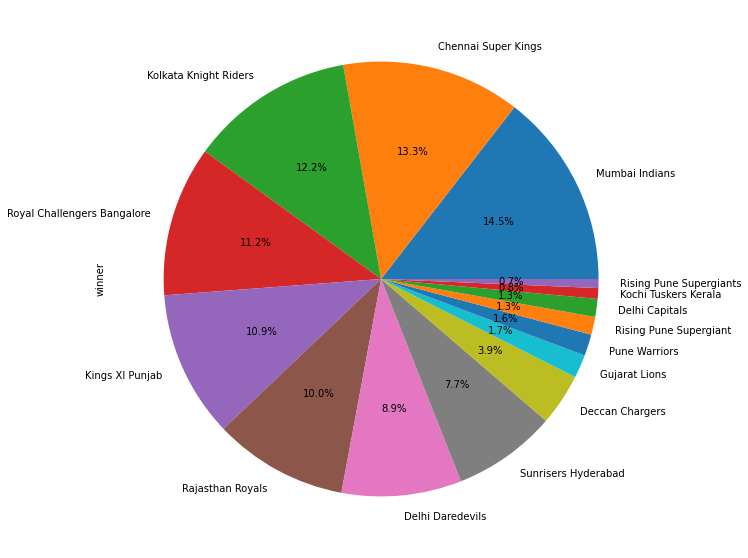

In [18]:
mdf.winner.value_counts().plot(kind='pie', figsize = [10,10], autopct='%1.1f%%')

In [19]:
# player of the match
mdf.player_of_match.value_counts().head(10)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

<AxesSubplot:>

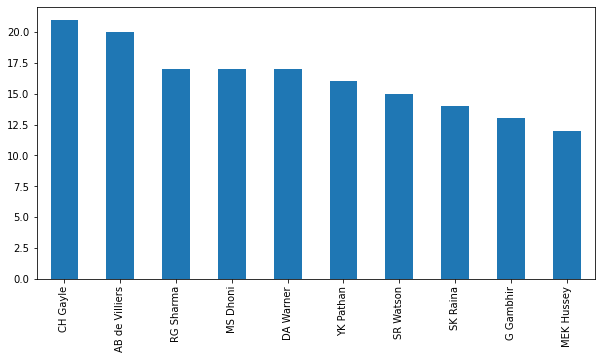

In [20]:
mdf.player_of_match.value_counts().head(10).plot(kind = 'bar', figsize = [10,5])

In [21]:
# venue
mdf.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

<AxesSubplot:>

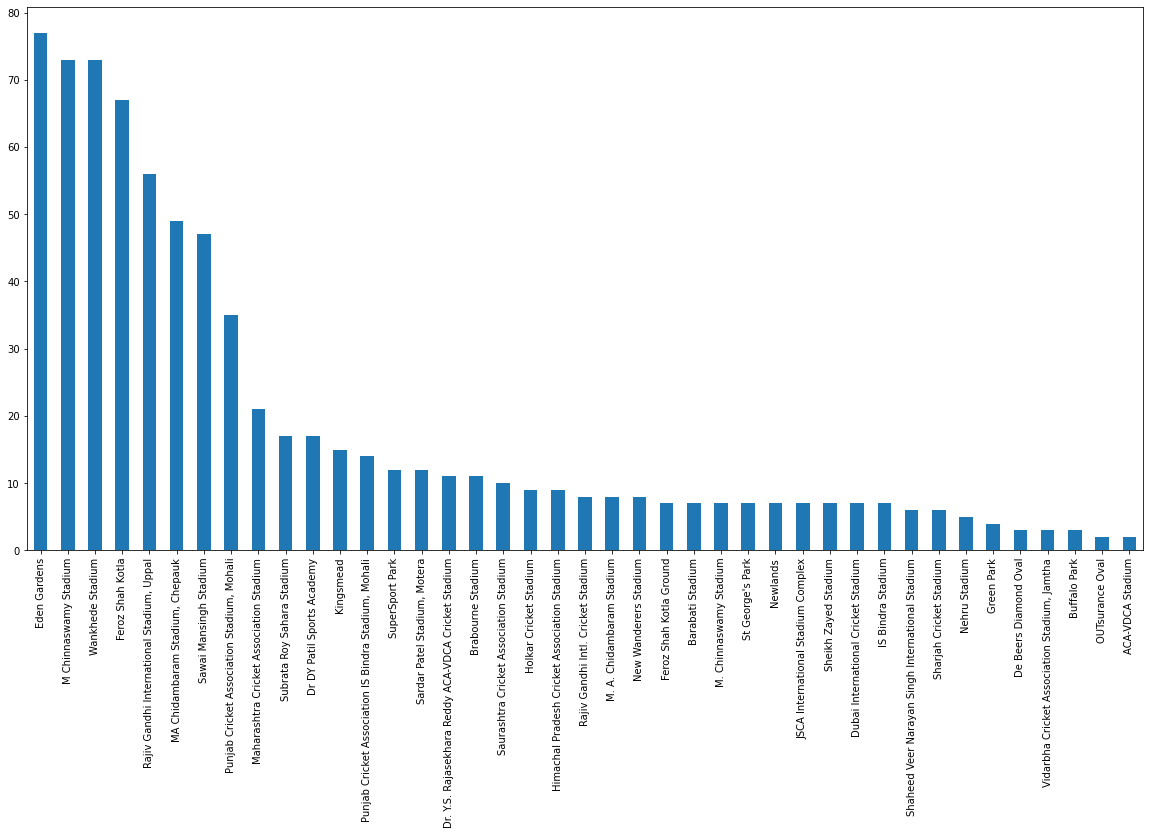

In [22]:
mdf.venue.value_counts().plot(kind = 'bar', figsize = [20, 10])

In [23]:
# Chapmion pr season
champ = mdf.drop_duplicates(subset = ['season'], keep = 'last')
champ

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


In [24]:
champ[['season', 'winner']]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


<AxesSubplot:ylabel='toss_decision'>

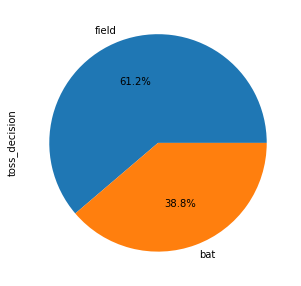

In [25]:
# decission on toss
mdf.toss_decision.value_counts().plot(kind = 'pie', figsize = [5,5], autopct='%1.1f%%' )

<AxesSubplot:xlabel='season', ylabel='count'>

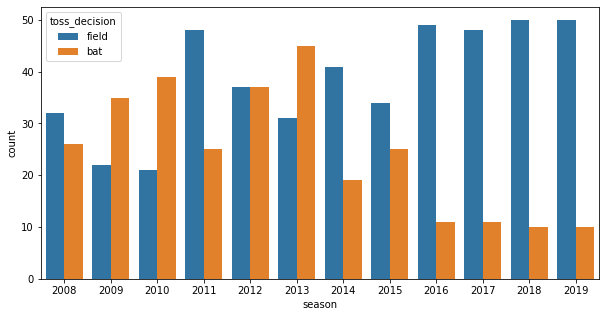

In [26]:
# variations of toss with seasons
plt.figure(figsize = [10,5])
sns.countplot(x = 'season', hue = 'toss_decision', data = mdf)

([<matplotlib.patches.Wedge at 0x2bf1af6d4c0>,
 [Text(-0.12770233435122916, 1.0925621784599937, 'win'),
  Text(0.1277024366442823, -1.0925621665036334, 'loss')],
 [Text(-0.06965581873703407, 0.5959430064327237, '53.7%'),
  Text(0.06965587453324489, -0.5959429999110727, '46.3%')])

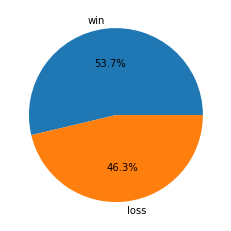

In [27]:
# win percentage after batting second
win = (mdf.win_by_wickets>0).sum()
loss = (mdf.win_by_wickets==0).sum()
total = win + loss
sizes = [(win/total)*100, (loss/total)*100]
plt.pie(sizes, labels = ['win', 'loss'], autopct='%1.1f%%')

In [28]:
# umpires
umpires = (mdf.umpire1.value_counts() + mdf.umpire2.value_counts())
top10umpires = umpires.sort_values(ascending = False).head(10)

<AxesSubplot:>

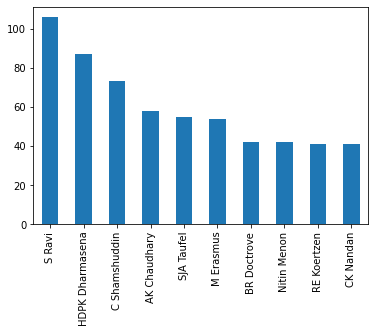

In [29]:
top10umpires.plot(kind = 'bar')

### Analysis of Deliveries

In [30]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   match_id        179078 non-null  int64 
 1   inning          179078 non-null  int64 
 2   batting_team    179078 non-null  object
 3   bowling_team    179078 non-null  object
 4   over            179078 non-null  int64 
 5   ball            179078 non-null  int64 
 6   batsman         179078 non-null  object
 7   non_striker     179078 non-null  object
 8   bowler          179078 non-null  object
 9   is_super_over   179078 non-null  int64 
 10  wide_runs       179078 non-null  int64 
 11  bye_runs        179078 non-null  int64 
 12  legbye_runs     179078 non-null  int64 
 13  noball_runs     179078 non-null  int64 
 14  penalty_runs    179078 non-null  int64 
 15  batsman_runs    179078 non-null  int64 
 16  extra_runs      179078 non-null  int64 
 17  total_runs      179078 non-nu

In [31]:
# top 10 batsmans
ddf.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

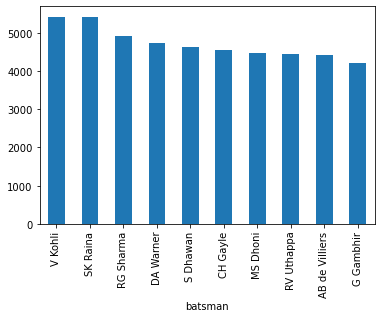

In [32]:
ddf.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [33]:
# most number of sixes
sixes = ddf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).sort_values(ascending = False).head(10)
sixes

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

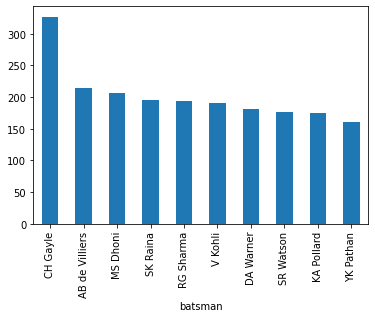

In [34]:
sixes.plot(kind = 'bar')

In [35]:
# most number of fours
fours = ddf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).sort_values(ascending = False).head(10)
fours

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman'>

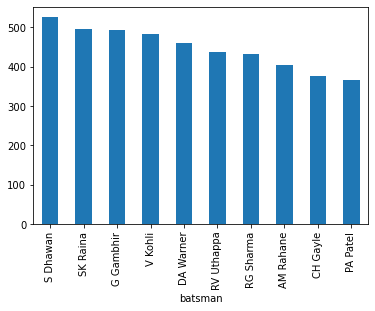

In [36]:
fours.plot(kind = 'bar')

In [37]:
# number of balls bowled
balls = ddf.groupby('bowler')['ball'].count().sort_values(ascending = False).head(10)
balls

bowler
Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: ball, dtype: int64

<AxesSubplot:xlabel='bowler'>

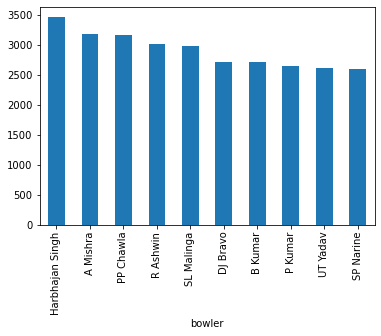

In [38]:
balls.plot(kind = 'bar')

<AxesSubplot:xlabel='dismissal_kind', ylabel='count'>

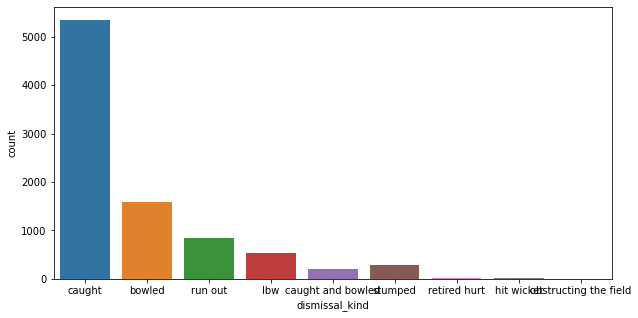

In [39]:
plt.figure(figsize = [10,5])
sns.countplot(x = 'dismissal_kind', data = ddf)

### Conclusion

1) Total number of seasons = 12

2) Total number of team participated in all seasons = 15

3) Team won by maximun numbers of runs is mumbai Indians 

4) Team won by maximum number of wickets is Kolkata Knight Riders 

5) Most number of matches in all seasons are played by Mumbai Indians followed by Royal Challengers Banglore 

6) Most number of matches are won by Mumbai Indians followed by Chennai Super Kings 

7) Most number of Player of the Match is awarded to Chris Gayle followed by AB De Villiers

8) V KOLHI scored the most runs in all seasons followed by Suresh Raina 

9) Most number of sixes are scored by Chris Gayle 

10) Most number of balls bowler by Harbhajan Singh